# Séries Temporais


As séries temporais podem ser definidas como uma sequência de observações de eventos. São dados que são coletados em diferentes pontos do tempo.

Data science de forma abstraída é trabalhar com dados que são coletados, registrados, armazenados em algum lugar, então explorados como forma de gerar insights que podem alimentar decisores ou uma decisão sua. E, se for o caso, construir modelos preditivos. 
Uma série temporal é a mesma coisa, mas essas observações de algumas variáveis acontecem dentro de **intervalos de tempos regulares**. 

O tempo pode ser utilizado com uma perspectiva do passado, do presente ou do futuro. 

Os problemas de séries temporais são diferentes de problemas de regressão porque eles tem uma dependência de tempo e se fizer qualquer mudança sem considerar isso, os resultados encontrados estarão errados. 

Os objetivos das séries temporais são:

* **Identificar padrões**: Identificar a natureza de um fenômeno que é identificado pela sequência de observações.
* **Fazer previsões**: Dependendo da profundidade do conhecimento em relação aos padrões identificados pode-se fazer previsões também. Fazer previsões é: pegar o que está no passasdo, entender, considerar todas as características de séries temporais e falar o que terá no futuro. 


A série temporal possui dois pontos primordiais:

* **Tendência**: A tendência é o padrão de crescimento (ou decrescimento) da variável que está sendo analisada, ao longo do tempo. Uma técnica muito utilizada para identificação de tendência é a regressão linear simples, através dela é encontrada a inclinação da reta de tendência. 

<center><img src = 'https://i1.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/series-temporais-2-1024x644.png?resize=1024%2C644' width=25%></center>

Com o gráfico de exemplo é possível ver que há uma tendência alta de crescimento, mesmo havendo suas subidas e descidas. Além disso, também é possível ver que está respeitando uma subida de crescimento, de onda. 

* **Sazonalidade**: São estações. São padrões que se repetem ao longo do tempo. Exemplo: Aumento da quantidade de aluguel de casas de temporada aumenta, em relação aos outros meses, durante os períodos de férias. Isso é uma sazonalidade porque é algo que acontece em um período específico e se repete ao longo dos anos. 

<center><img src = 'https://sigmoidal.ai/wp-content/uploads/2020/03/ScreenShot030-2.gif' width=25%></center>

Esse gráfico representa o número de visitantes no Parque Nacional Abel Tasman, ao analisar ele percebe-se que há um pico entre os meses de dezembro e janeiro. Isso é recorrente. 

É importante reconhecer a sazonalidade em uma time series. Falhar nesse reconhecimento implica em geração de modelos e interpretações incorretas. 

Como identificar sazonalidade? 

* Teoria e conhecimento sobre o dado é capaz de gerar *insights* de presença e frequência de sazonalidade.
* Plotar gráficos ajuda a identificar se há ou não tendências óbvias de sazonalidade. 
* Realizar análise e testes estátisticos.

In [31]:
#Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np

sns.set_style()

%matplotlib inline

## Importar Séries Temporais

O dataset utilizado nesse *notebook* é de consumo de eletricidade. 

In [2]:
#Dataset url
dataset_path = 'https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv'

#Importar o arquivo csv
df = pd.read_csv(dataset_path)

#Ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


Percebe-se que o formato de data do conjunto de dados é de mês-dia-ano. 

In [3]:
df.DATE

0      01-01-1985
1      02-01-1985
2      03-01-1985
3      04-01-1985
4      05-01-1985
          ...    
392    09-01-2017
393    10-01-2017
394    11-01-2017
395    12-01-2017
396    01-01-2018
Name: DATE, Length: 397, dtype: object

A coluna date está em formato de string, mas ela é data. Então será necessário fazer uma conversão. 

In [4]:
#[ANTES] Converter a coluna data em datetime
print('[ANTES]')
display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [5]:
#[DEPOIS] Converter a coluna data em datetime
print('[DEPOIS]')
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

Na própria documentação apresenta alguns exemplos de formato para fazer a conversão da coluna, como por exemplo: '%d/%m/%Y'. Nesse caso o "d" é o dia, o "m" o mês e o "Y" é o ano. Se o "Y" fosse minusculo estaria falando que o ano está representado apenas com 2 digítos. 

In [6]:
#Converter DATE para datetime e associar o dataframe index
df.index = pd.to_datetime(df.DATE, format='%m-%d-%Y')

#Eliminar a coluna DATE
df.drop('DATE', inplace=True, axis=1) #Axis = 1 --> eliminar a coluna. 

#Ver as 5 primeiras entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## Visualizar séries temporais

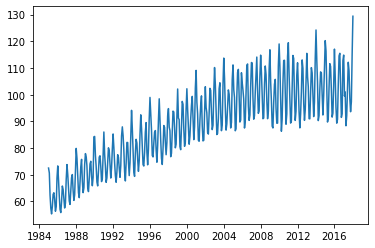

In [7]:
#Plotar o gráfico
plt.plot(df.index, df.Value);

Só de ver o gráfico sabe-se que a tendência do consumo de energia nos EUA é crescente, por mais que tenha algumas oscilações. 

## Decompor uma Time Series em seus componentes 

Fazer a decomposição ajuda no entendimento do resultado obtido que muitas vezes não vai ser claro o suficiente.

A decomposição pode ser feita através de uma combinação aditiva ou multiplicativa de cada um dos seus componentes. 

A biblioteca stastmodels tem uma função chamada `seasonal_decompose` que é muito útil para fazer essa decomposição. 

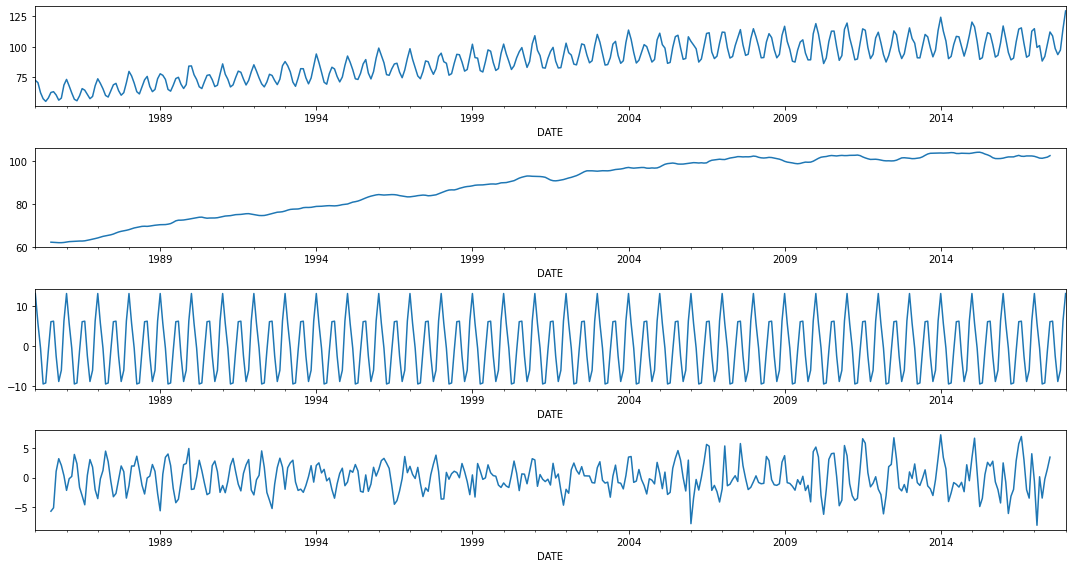

In [8]:
#Salvar o resultado da decomposição
result = seasonal_decompose(df)

#Plotar a decomposição
#result.plot();

#Melhor plotagem
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

Ao fazer a decomposição percebe-se claramente que tem uma tendência de alta na quantidade de consumo de energia elétrica. 

## Análise Exploratória e Extração de Features

Para essa análise será utilizado um datase contendo dados de uma suposta ferroviária que utiliza uma nova tecnologia de propulsão.

In [9]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

#Importar os dados do empresa ferroviaria
df_trem = pd.read_csv(ferroviaria_dataset) 

#Ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


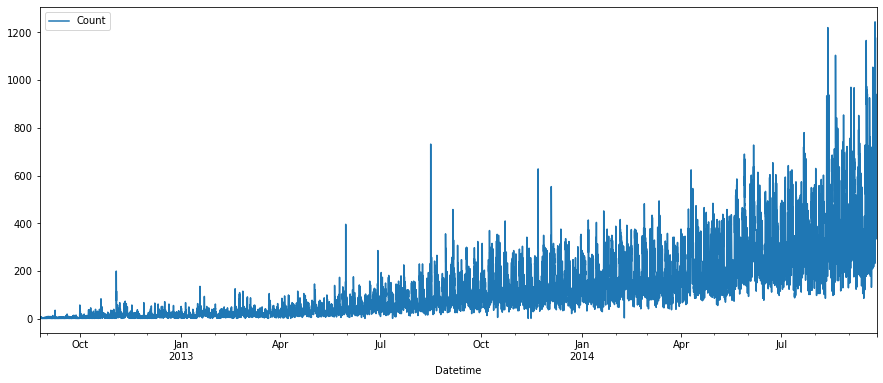

In [10]:
#Converter a coluna datetime em datetime
df_trem['Datetime'] = pd.to_datetime(df_trem['Datetime'], format='%d-%m-%Y %H:%M')

#Plotar o gráfico
fig, ax = plt.subplots(figsize = (15, 6))
df_trem.plot(x = 'Datetime', y='Count', ax=ax);

Tem uma tendência de alta, mas o gráfico está muito poluido, muito bagunçado. 

Hipóteses: 

* Pessoas viajam mais durante a semana
* Há horários de pico por causa das indas e vindas do trabalho. 
* Há períodos do ano onde a demanda por transporte é maior.

Para descobrir mais sobre essas hipóteses será criado features para cada período (ano, mês, dia, horario, dia da semana). 

In [11]:
#Criar features para cada período
df_trem['year']= df_trem.Datetime.dt.year
df_trem['month']= df_trem.Datetime.dt.month
df_trem['day']= df_trem.Datetime.dt.day
df_trem['hour']= df_trem.Datetime.dt.hour
df_trem['day_of_week']= df_trem.Datetime.dt.dayofweek

In [12]:
#Ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


**Primeira hipótese:**

Pessoas viajam mais durante a semana

In [13]:
#Converter as variáveis em 0 ou 1
df_trem['weekend'] = 0
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

Aqui é feita conversão das variáveis onde todos os dias que forem sábado ou domingo serão colocados o valor de 1 e se for dia da semana serão 0. essa conversão facilita para descobrir se a hipótese é verdadeira ou não. 

In [14]:
#Ver os valores do fim de semana x dias da semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

<AxesSubplot:xlabel='weekend'>

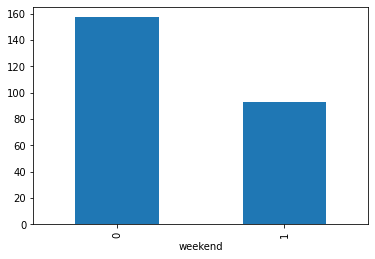

In [15]:
#Plotar os valores finais: fim de semana x dias da semana
df_trem.groupby('weekend').Count.mean().plot.bar()

Ao analisar os resultados descobre-se que a hipótese é verdadeira, já que o número de pessoas durante a semana é superior ao número de pessoas no fim de semana. Isso provavelmente se deve ao fato de que durante a semana as pessoas usam mais os trens para poderem ir trabalhar. 

**Segunda hipótese:**

Há horários de pico por causa das indas e vindas do trabalho.

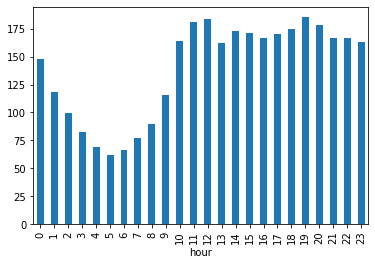

In [16]:
#Ver a contagem por hora
df_trem.groupby('hour').Count.mean().plot.bar();

Há uma diminuição do pico durante a madrugada, o que é esperado visto que é a hora que as pessoas costumam sair menos de casa. Ao longo do dia há alguns picos maiores, que parecem ser de quando as pessoas estão indo e voltando do trabalho, já que esses picos são mais para o início e fim do horário comercial.

**Terceira hipótese:**

Há períodos do ano onde a demanda por transporte é maior.

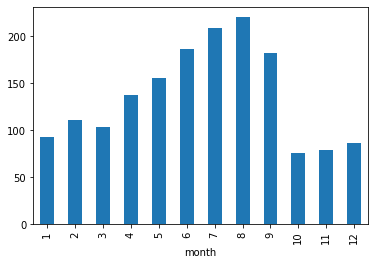

In [17]:
#Ver a contagem por mês
df_trem.groupby('month').Count.mean().plot.bar();

Há uma diminuição da utilização quando chega para o fim do ano, isso provavelmente se deve as férias que as pessoas tiram. 

Apenas com essa parte já deu para ver o quão poderoso pode ser uma análise exploratória de séries temporais. 

## Técnicas de *Forecasting*

***Forecasting***: É uma técnica que prevê o que acontecerá utilizando eventos do presente e do passado.

Um ponto importante de ter em mente ao utilizar técnicas de previsão é que quanto mais no futuro for a resposta desejada, menor é a capacidade de realmente inferir algo. 

Antes de fazer qualquer previsão é necessário entender o que é uma série estácionaria. 

**Série estacionária**: Tem uma média constante, uma variância constante e uma covariância de Ti e Ti + m constante, tudo em relação ao tempo. Ela varia em torno de uma mesma média ao longo do tempo. 

Se a série não for estacionária tem que fazer com que ela se torne, porque não pode ter uma tendência crescente (é necessário que ela varie mais ou menos no tempo). Para saber se uma série é ou não estacionária utiliza-se principalmente o método *Dickey-Fuller*. 

### Naive Approach

Esse é o método ingênuo. Diz que a previsão do período T + 1 é puramente uma previsão do período imediatamente anterior. 

Esse método tem o problema de replicação do valor, isso faz com que o erro fique muito grande. Mas ele server como uma *baseline* inicial para que evite treinamentos extremamentes robustos quando na verdade o modelo é o de Naive. 

O primeiro passo para a utilização das técnicas de *forecasting* é a separação dos dados em treino e teste. 

In [19]:
#Dividir em treino e validação 
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

#Criar o dataframe de previews
y_hat = valid.copy()

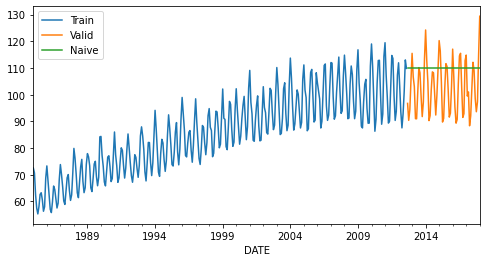

In [20]:
#Copiar o valor do último dataset de treino e atribuir a h_hat['naive']
y_hat['naive'] = train.iloc[-1].values[0]

#Plotar o treino e a validação
fig, ax = plt.subplots(figsize = (8, 4))
train.plot(ax = ax)
valid.plot(ax = ax)
y_hat['naive'].plot(ax = ax)
ax.legend(['Train', 'Valid', 'Naive'])
plt.show()

In [21]:
#Cálculo do erro
print('Erro do método Naive Method:')
mean_squared_error(y_hat['Value'], y_hat['naive'], squared = True)

Erro do método Naive Method:


144.18290826476925

### Média móvel

Nesse método pega-se uma janela temporal arbitraria e tira uma média em cima deles. Com esse valor da média, dividido pela quantidade de tempo da janela temporal é possível saber qual o próximo dia terá aquele resultado. Uma das funções da média móvel é suavizar o resultado, mas ela também pode ser utilizada para prever.

Nesse caso o erro já um pouco menor do que no método de Naive.

Há também a **média exponencial** que dá mais valor para o que aconteceu mais recentemente, já que ela tende a ser melhor na maior parte das situações. 

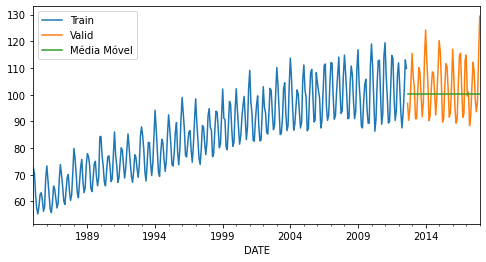

In [22]:
#Calcular a média dos últimos 7 valores
y_hat['m7'] = train['Value'].rolling(7).mean().iloc[-1]

#Plotar os valores de train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['m7'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Média Móvel'])
plt.show()

In [23]:
#Calcular o erro da média movel
print('Erro do método Média de 7 dias:')
mean_squared_error(y_hat.Value, y_hat.m7, squared=True)

Erro do método Média de 7 dias:


101.21254960492308

### Holt's Linear Trend Model

Esse método permite que também trabalhe a inclinação da reta, além de trabalhar o nível (se está para cima ou para baixo). Ele tende a obter um resultado melhor do que das técnicas utilizadas anteriormente. 

In [24]:
#Importar pacotes necessários
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

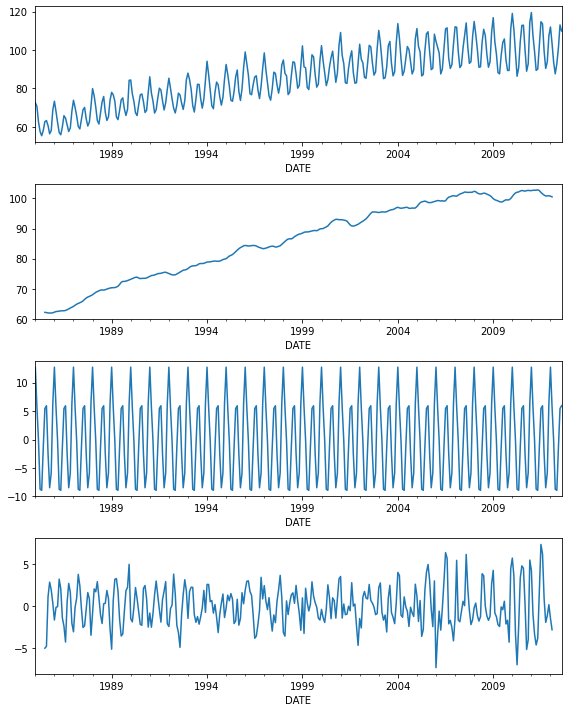

In [25]:
#Salvar os componentes da time series na variável results
result = seasonal_decompose(train)

#Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

/home/renata/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/renata/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-26-0e05bbe690e8>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  y_hat['holt'] = Holt(train.Value).fit(smoothing_level = 0.1, smoothing_slope = 0.1).forecast(len(valid))


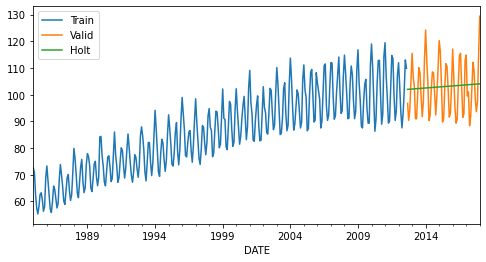

In [26]:
#Salvar os valores para o dataset valid usando o método Holt's
y_hat['holt'] = Holt(train.Value).fit(smoothing_level = 0.1, smoothing_slope = 0.1).forecast(len(valid))

# plotar train e valid
fig, ax = plt.subplots(figsize=(8,4))
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['holt'].plot(ax=ax)
ax.legend(['Train', 'Valid', 'Holt'])
plt.show()

In [27]:
#Calcular o erro do método Holt's
print("Erro do Holt's Linear Trend Model:")
mean_squared_error(valid.Value, y_hat.holt, squared=True)

Erro do Holt's Linear Trend Model:


93.79197449495156

### Teste de Dickey-Fuller

In [28]:
#Importatr o ADF teste
from statsmodels.tsa.stattools import adfuller

#Importar os data 
df_est = pd.read_csv(dataset_path, index_col = 0, squeeze=True)

#Extrair os valores
X = df_est.values

#Aplicar ADF e printar o resultado
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico -2.2570
Valor-p: 0.1862
Valores críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


Em estatística **toda espécie nula é verdade**. → Essa é a premissa tomada. Exemplo: Assume-se que toda série não é estacionária, portanto é necessário provar ao contrário. 

Tendo isso em mente agora é possível entender o que está sendo calculado:

* A hipótese nula ($H_0$) é que a série temporal não é estacionária, ou seja, ela tem alguma dependência em relação ao tempo. 
* A hipótesse alternativa ($H_1$) rejeita a hipótese nula, isso quer dizer que a série temporal é estacionária. 

O resultado é interpretado utilizando o valor-p (p-value). Se o resultado dele for abaixo de 5% (0,05) a série é estacionária, se for maior será estacionária. A princípio essa regra é sempre válida. 

Quanto menor for o p-value, maior a evidência contra a hipótese nula. Se o p-value for igual a 0.05 o $H_0$ será rejeitado com nível de confiança de 95%. 

Se o valor do teste ficar acima a rejeição da hipótese nula é falha. Não quer dizer que $H_0$ é verdadeira, quer dizer apenas que o experimento não encontrou evidências para rejeitar. 

O resultado apresentado foi maior que 5% portanto a série não é estacionária.

### Transformando a Série Temporal em Estacionária

Para transformar a série temporal em estacionária é necessário retirar a tendência e sazonalidade presente nos dados originais. O método inicial recomendado é o *log*, para poder reduzir a magnitude dos valores da série temporal, após aplicar esse método é subtrai-se a média móvel de um período determinado, relacionado com o *log*. 

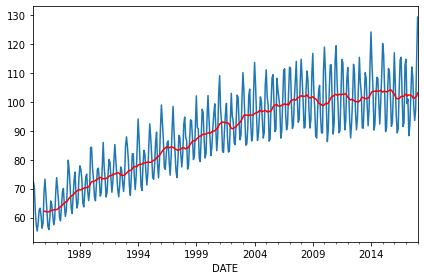

In [29]:
#Ver o plot original
ma = df.rolling(12).mean()

fig, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

Olhando o gráfico tem mais uma evidência que essa série não é estacionária.

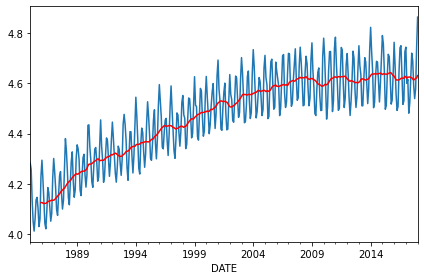

In [32]:
#Aplicar log
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

Nota-se uma grande redução dos valores (vide eixo y).

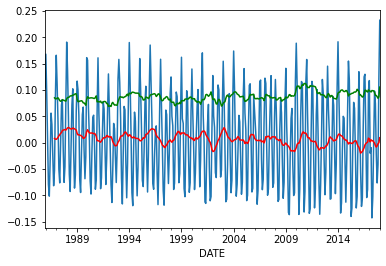

In [33]:
#Subtrair a média do log
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show()

Só o fato de tirar o log e, na sequência, tirar a média no período de 12 meses já melhorou muito o resultado. 

Observaçõa: O período aplicado varia caso a caso. 

In [34]:
#Repetir teste ADF
X_sub = df_sub.Value.values

#Aplicar ADF e ver o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.2116
Valor-p: 0.0000083256
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


Com o resultado obtido tem mais uma prova de que a tendência foi removida e a série foi transformada em estacionária. 

#### Diferenciação

Outro método para tornar uma série estacionária. É simplesmente calcular a diferença entre duas observações possíveis. 

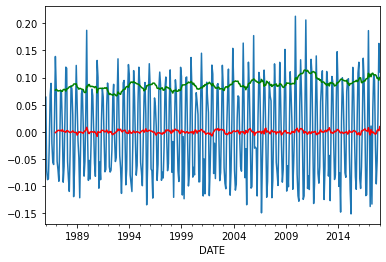

Dickey-Fuller Aumentado
Teste Estatístico: -7.6511
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4483
	5%: -2.8694
	10%: -2.5710


In [35]:
#Aplicar diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

#Extrair apenas os valores
X_sub = df_diff.Value.dropna().values

#Aplicar teste ADF
result_diff = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

O resultado está cada vez melhor.

### Forecasting usando ARIMA

O modelo ARIMA(*Auto Regressive Integrated Moving Average Model*) é uma combinação entre os métodos de diferenciação (utilizado acima),  os modelos de autoregressão e a média móvel.

Significado de ARIMA:

* **AR**: *Autoregression* -> usa a relação de dependência entre uma observação e um número de *lagged observations*.
* **I**: *Integrated* -> utiliza a diferenciação das observações *raw* para transformar a série temporal em estacionária.
* **MA**: *Moving Average** -> usa a dependência entre uma observação e o erro residual proveniente de uma média móvel aplicada a *lagged observations*. 

Ao usar o ARIMA tem que dar os valores p, d e q. O `q` é quando a autocorrelação cruza o limite superior pela primeira vez (isso fica mais claro ao ver o gráfico). O `p` é quando a autocorrelação parcial cruza o limite superior pela primeira vez (isso fica mais claro ao ver o gráfico). Ao encontrar os parâmetros otimizados p, d e que será utilizada as funções ACF (autocorrelação) e PACF (Autocorrelação parcial).

In [36]:
#Melhores parâmetros para o modelo
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

/home/renata/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


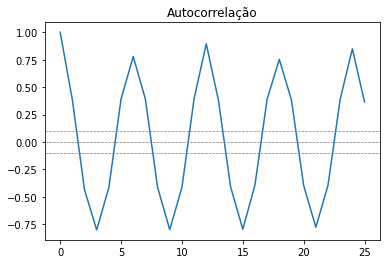

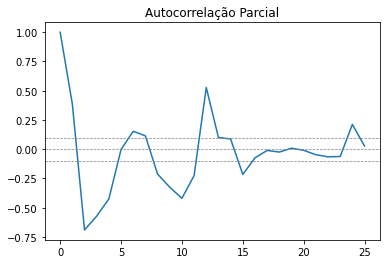

In [37]:
#Plotar ACF e PACF
plt.plot(lag_acf)
plt.axhline(y = - 1.96/(np.sqrt(len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt(len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title('Autocorrelação')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y = - 1.96/(np.sqrt(len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt(len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title('Autocorrelação Parcial')
plt.show()

Os valores otimizados dos parâmetros do modelo ARIMA podem ser identificados ao olhar os gráficos plotados acima:

* **q**: É o valor onde o **ACF** cruza com o limite superior do intervalo de confiança pela primeira vez. 
* **p**: É o valor onde o **PACF** cruza com o limite superior do intervalo de confiança pela primeira vez. 

In [ ]:
#Treinar o modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2, 1, 2))
result = model.fit()

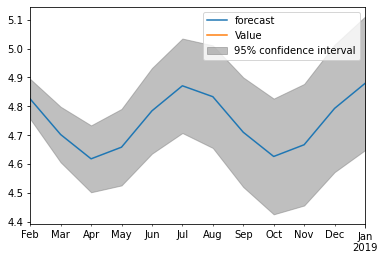

In [39]:
result.plot_predict(start='2018-02-01', end='2019-01-01');

A área cinzenta é o intervalo de confiança. 

# Conclusão

Foi possível aprender o que são séries temporais, assim como identificar elas. Além disso foi apresentado modelos para previsão de séries temporais, alguns modelos e manipulações foram vistas, sempre objetivando em chegar a um resultado verdadeiro e bom o suficiente. 